# Bayes

https://en.wikipedia.org/wiki/Thomas_Bayes

![bayes](data/bayes0.jpeg)

$$A \cap B = B \cap A$$

$$P(A \cap B) = P(B \cap A)$$

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

### Regla de Bayes

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

donde:

+ $P(A|B) :=$ A posteriori
+ $P(A) :=$ A priori
+ $P(B|A) :=$ Verosimilitud (likelihood)
+ $P(B) :=$ Marginal de B


En realidad:
$$P(B) = \sum_{\Omega} P(B|A)P(A)$$

# Ejemplo: Seguro de coche segun color

**Eventos**

+ $A: =$ Accidente de coche
+ $B: =$ Color del coche (rojo, por ejemplo)

**¿Que es cada cosa?**

+ $P(A|B) :=$ ¿Prob de tener un accidente si mi coche es rojo? (lo que buscamos)
+ $P(A) :=$ Prob de accidente (proporcion de coches accidentados en todo el parque movil)
+ $P(B|A) :=$ Si ya he tenido un accidente, ¿cual es la prob de que mi coche sea rojo? (proporcion de coches rojos entre los accidentados)
+ $P(B) :=$ Prob de coche rojo (proporcion de coches rojos en todo el parque movil)

**Supongamos...**
 
+ $P(A) = 0.1$ 
+ $P(B|A) = 0.3$ 
+ $P(B) = 0.2$


**Entonces..**

In [2]:
print ('P(A|B) = {}'.format(0.3*0.1/0.2))

P(A|B) = 0.15


### 1. Cookie Problem
Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
prioris=[1/2, 1/2]         # cuenco de galletas

v_vainilla=[3/4, 2/4]      # verosimilitud vainilla
v_chocolate=[1/4, 2/4]

In [15]:
b = sum(np.multiply(prioris,v_vainilla))

In [19]:
np.divide(np.multiply(prioris, v_vainilla),b)

array([0.6, 0.4])

In [11]:
def bayes(priori, verosimilitud):                    # regla de Bayes
    marginal=sum(np.multiply(priori, verosimilitud))
    posteriori=np.divide(np.multiply(priori, verosimilitud), marginal)
    return posteriori

In [12]:
bayes(prioris,v_vainilla) 
#Se tiene la probabilidad de quela galleta se vainilla y de que venga del primer es del 60%
# y de que venga del segundo es del 40%

array([0.6, 0.4])

In [21]:
bayes(prioris,v_chocolate)
#Se tiene la probabilidad de quela galleta se chocolate y de que venga del segundo bowl es del 66%
# y de que venga del primero es del 30%

array([0.33333333, 0.66666667])

### 2. Candy Problem
Suppose you have two bags of candies:

In **Bag 1**, the mix of colors is:
* Brown - 30%
* Yellow - 20%
* Red - 20%
* Green - 10%
* Orange - 10%
* Tan - 10%


In **Bag 2**, the mix of colors is:
* Blue - 24%
* Green - 20%
* Orange - 16%
* Yellow - 14%
* Red - 13%
* Brown - 13%




Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.

In [22]:
prioris=[1/2, 1/2] 

In [24]:
v_marron = [0.3, 0.13]
v_amarillo = [0.2,0.14]
v_verde = [0.1, 0.2]
v_red = [0.2,0.13]
v_naranja = [0.10, 0.16]
v_azul = [0,.24]
v_tan = [0.1,0]

array([0.58823529, 0.41176471])

In [26]:
print(bayes(prioris,
            [v_amarillo[0]*v_verde[1],v_amarillo[1]*v_verde[0]]))
#Obtenemos la probabilidades de que se obtenga un dulce amarillo de las bolsas
#con un 74% de que venga de la primer bolsa!

[0.74074074 0.25925926]


In [27]:
print(bayes(prioris,
           [v_naranja[1]*v_azul[0], v_naranja[0]*v_azul[1]]))

[0. 1.]


### 3. Monty Hall Problem
Suppose you are a contestant on the popular game show Let's Make a Deal. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [28]:
prioris=[1/3, 1/3, 1/3]  #Probabilidad de puertas

In [29]:
v_premio= [0,1/2, 1] #verosimilitud
bayes(prioris,v_premio)[1]

0.3333333333333333

In [30]:
print (bayes(prioris, v_premio)[2])

0.6666666666666666


In [31]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [33]:
stu  = pd.read_csv('data/student-mat.csv')

In [34]:
stu

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [35]:
stu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [36]:
stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [113]:
#Definir la variables que utilizaremos si las variables son categoricas las convertimos a 0,1

data = pd.get_dummies(stu.loc[:,['age','address','failures','higher','internet','health','G1','G2']])
x_train = data.copy() #Hacemos una copia del original

In [114]:
x_train #Con que variables precediremos nuestra variable dependiente y, para este caso tratamos de 

,age,failures,health,G1,G2,address_R,address_U,higher_no,higher_yes,internet_no,internet_yes
0,18,0,3,5,6,0,1,0,1,1,0
1,17,0,3,5,5,0,1,0,1,0,1
2,15,3,3,7,8,0,1,0,1,0,1
3,15,0,5,15,14,0,1,0,1,0,1
4,16,0,5,6,10,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,4,9,9,0,1,0,1,1,0
391,17,0,2,14,16,0,1,0,1,0,1
392,21,3,3,10,8,1,0,0,1,1,0
393,18,0,5,11,12,1,0,0,1,0,1


In [44]:
target = stu['G3']#Definimos la Variable que predeciremos en este caso la calificacion del tercer periodo

In [46]:
x_train = x_train.loc[:370] #Obtenemos las variables con las que entrenaremos el modelo

In [47]:
x_train

,age,failures,health,G1,G2,address_R,address_U,higher_no,higher_yes,internet_no,internet_yes
0,18,0,3,5,6,0,1,0,1,1,0
1,17,0,3,5,5,0,1,0,1,0,1
2,15,3,3,7,8,0,1,0,1,0,1
3,15,0,5,15,14,0,1,0,1,0,1
4,16,0,5,6,10,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
366,18,0,5,13,13,0,1,0,1,0,1
367,17,1,1,7,6,1,0,0,1,0,1
368,18,0,4,11,10,0,1,0,1,0,1
369,18,0,5,14,12,1,0,0,1,0,1


In [48]:
y_train = target.loc[:370] 
#De igual manera seleccionaremos las variables con las que entrenaremos con la variable dependiente

In [49]:
y_train

0       6
1       6
2      10
3      15
4      10
       ..
366    13
367     0
368    10
369    11
370     9
Name: G3, Length: 371, dtype: int64

In [52]:
x_test = data[370:]
x_test
#LA variables que usaremos para precedecir, 'y' correspondiente 

,age,failures,health,G1,G2,address_R,address_U,higher_no,higher_yes,internet_no,internet_yes
370,19,2,3,7,7,0,1,0,1,1,0
371,18,0,3,14,12,1,0,1,0,0,1
372,17,0,3,13,11,0,1,0,1,1,0
373,17,0,1,6,5,1,0,0,1,0,1
374,18,0,1,19,18,1,0,0,1,0,1
375,18,0,4,8,8,1,0,0,1,0,1
376,20,2,3,15,14,0,1,0,1,0,1
377,18,0,2,8,9,1,0,0,1,0,1
378,18,0,1,15,15,0,1,0,1,0,1
379,17,0,1,10,10,1,0,0,1,0,1


In [53]:
y_test = target.loc[370:]
#Usaremos la segunda parte de la variable dependiente para corroborar la prediccion

In [62]:
y_test

370     9
371    12
372    11
373     5
374    19
375    10
376    15
377    10
378    15
379    10
380    14
381     7
382    10
383     0
384     5
385    10
386     6
387     0
388     8
389     0
390     9
391    16
392     7
393    10
394     9
Name: G3, dtype: int64

In [56]:
from sklearn.naive_bayes import CategoricalNB


In [57]:
gnb = CategoricalNB()#Se asgina el modelo de naive_bayes para categoricas 

In [58]:
modelo = gnb.fit(x_train,y_train) #x-train tendra las caracteristicas para predicir y_train y entrenarse

In [63]:
y_pred = modelo.predict(x_test)#se predice con x_test para obtener la prediccion y poder contrastar con la verdad

In [115]:
y_pred - y_test #Diferencia entre la verdad y la prediccion

370   -9
371    0
372    1
373   -5
374   -1
375   -2
376   -1
377    0
378    0
379    0
380    0
381   -7
382    1
383    0
384   -5
385    0
386   -6
387    0
388    0
389    0
390    0
391   -1
392    0
393    1
394   -1
Name: G3, dtype: int64

In [61]:
y_pred

array([ 0, 12, 12,  0, 18,  8, 14, 10, 15, 10, 14,  0, 11,  0,  0, 10,  0,
        0,  8,  0,  9, 15,  7, 11,  8], dtype=int64)

# PCA

**PCA** es una transformación lineal usada para reducir dimensiones en los datos.

¿Por qué reducir dimensiones?

Existen varias razones, entre ellas:
+ Mejora de la performance
+ Mejor manejo de la dispersión de los datos
+ Maldición de las dimensiones (ojo-también existe la bendición)
+ etc...


Hay dos maneras diferentes de hacer ésta transformación:

+ A través de la matriz de correlaciones (dimensiones no homogéneas)
+ A través de la matriz de covarianzas (dimensiones homogéneas)

Ambas matrices son simétricas y diagonalizables. De hecho, el Teorema Espectral dice que si una matriz es hermítica, cuadrada y de dimensión finita, entonces existe una base de vectores propios donde dicha matriz puede ser representada.
Esto quiere decir que podemos cambiar de base para después proyectar, reduciendo las dimensiones e intentando conservar la máxima información en el nuevo subespacio.

![gio1](data/gioconda.jpeg)
![gio2](data/gioconda_lego.png)

![](data/pca_1.png)

![](data/pca.png)

**Combinacion lineal**

v1> vector 1
v2> vector 2

comb lineal = 2*v1> - 4*v2>

**Combinacion no lineal**

comb no lineal = 2*v1>*v2>

##### Resumen PCA

+ Normalización de los datos
+ Obtener base de vectores propios desde matriz de correlacion o covarianza
+ Ordenar los vectores propios de mayor a menor según sus dimensiones en el nuevo subespacio
+ Matriz de proyección, con los autovectores seleccionados (W)
+ Se transforma X (los datos) según W (matriz de proyección)

In [71]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalizacion

from sklearn.decomposition import PCA    # PCA

import warnings
warnings.simplefilter('ignore')

In [69]:
data=pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [116]:
data=data.drop(columns=['target_class']) #Separamos la variable que queremos predecir

KeyError: "['target_class'] not found in axis"

#### normalización

Recordemos, el primer paso de PCA es la normalización de los datos. 

Primero, veamos la 'standarización'   ($N(\mu, \sigma)$):

$$\frac{x_i-\mu}{\frac{\sigma}{\sqrt{n}}}$$

In [76]:
import math

In [117]:
data_n_mano = (data-np.mean(data))/np.std(data) #Normalizacion de los datos a mano usando la formula

In [88]:
data_n_mano

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794
...,...,...,...,...,...,...,...,...
17893,0.988208,1.943284,-0.625655,-0.406697,-0.384010,-0.727295,1.586054,1.700034
17894,0.447319,0.429062,-0.328831,-0.234643,0.128776,0.939926,-1.189159,-0.906574
17895,0.321842,1.956220,-0.299334,-0.407492,0.299137,1.671568,-1.288079,-0.941330
17896,0.133628,1.074510,-0.260050,-0.291041,-0.361967,-0.664857,0.378257,0.275850


In [118]:
data_n=StandardScaler().fit_transform(data) #Tambien podemos utilizar StandardScaler para normalizar 

In [90]:
data_n

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

In [119]:
pca=PCA(n_components = 2) #DEfinimos una reduccion  de dimensiones a 2

pca.fit(data_n) #Posteriormente entrenamos el modelo


PCA(n_components=2)

In [97]:

df=pd.DataFrame(pca.fit_transform(data_n))

df.head()

,0,1
0,-1.278849,-1.273133
1,-1.020553,-0.201162
2,0.188289,0.432114
3,-1.015466,-1.469881
4,-0.822626,2.123651


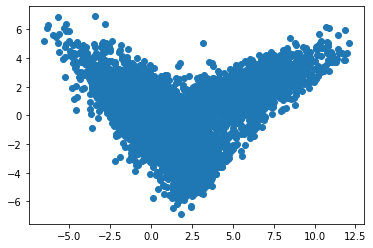

In [122]:
plt.scatter(df[df.columns[0]],df[df.columns[1]])

In [103]:
pca=PCA(n_components = 2)# Reduccion a 2 dimensiones

pca.fit(data)

PCA(n_components=2)

In [106]:

df_2=pd.DataFrame(pca.fit_transform(data))

df_2.head()

,0,1
0,-27.191086,-29.677875
1,24.476215,-6.024175
2,-39.938920,-10.828048
3,-48.000825,-29.833257
4,147.919433,18.562548


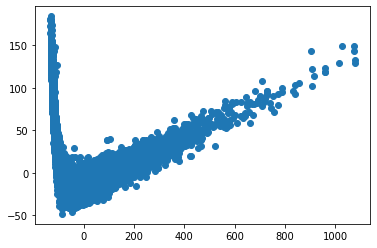

In [107]:
plt.scatter(df_2[df_2.columns[0]],df_2[df_2.columns[1]])#Scatter sin normalizar

Ahora el MinMax :

$$\frac{x-min}{max-min}$$

In [109]:
data_mm_mano=(data-np.min(data))/(np.max(data)-np.min(data))

data_mm=MinMaxScaler().fit_transform(data) #Estandarizacion por MinMax

np.sum(data_mm_mano-data_mm) # la diferencia entre  hacerlo a mano o hacerlo con libreria

 Mean of the integrated profile                  1.568736e-13
 Standard deviation of the integrated profile    5.605374e-14
 Excess kurtosis of the integrated profile       1.882314e-13
 Skewness of the integrated profile              2.829209e-14
 Mean of the DM-SNR curve                        1.212409e-13
 Standard deviation of the DM-SNR curve          4.598752e-14
 Excess kurtosis of the DM-SNR curve            -2.881462e-13
 Skewness of the DM-SNR curve                    6.918713e-14
dtype: float64

In [110]:
data_mm

array([[0.72134164, 0.41768745, 0.16504291, ..., 0.11368057, 0.29498574,
        0.06388987],
       [0.51762787, 0.46090841, 0.23541516, ..., 0.0725243 , 0.36401483,
        0.10844339],
       [0.52034628, 0.19686832, 0.22113842, ..., 0.13918843, 0.28862387,
        0.05461031],
       ...,
       [0.60771193, 0.4751437 , 0.2046521 , ..., 0.49869934, 0.14965285,
        0.00550903],
       [0.58186609, 0.39361695, 0.20885482, ..., 0.05820853, 0.34892638,
        0.11418141],
       [0.27435072, 0.82458965, 0.33003783, ..., 0.5552546 , 0.04091771,
        0.00285542]])

In [111]:
data_mm_mano

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369
...,...,...,...,...,...,...,...,...
17893,0.699218,0.473948,0.169741,0.015077,0.004855,0.046437,0.493364,0.241336
17894,0.624942,0.333936,0.201496,0.030260,0.072572,0.360761,0.161482,0.008612
17895,0.607712,0.475144,0.204652,0.015007,0.095069,0.498699,0.149653,0.005509
17896,0.581866,0.393617,0.208855,0.025283,0.007766,0.058209,0.348926,0.114181
